In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [80]:
image_rgb = matplotlib.image.imread('img.jpg')
image_rgb.shape

(1221, 1589, 3)

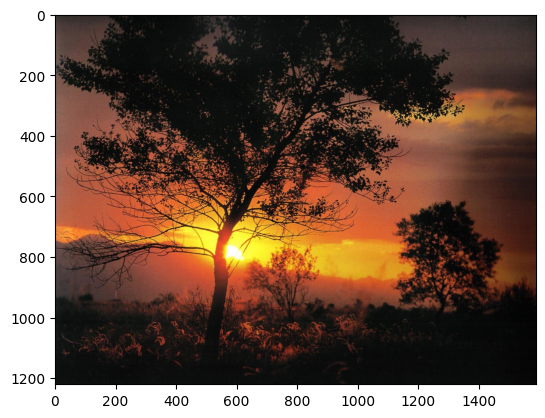

In [81]:
plt.imshow(image_rgb)

In [82]:
def darken(image):
    new_image = image.astype(float)-128
    new_image[new_image<0]=0
    return new_image.astype(int)
def lower_contrast(image):
    return image//2
def non_linear_lower_contrast(image):
    return (((image/255.0)**(1/3))*255).astype(int)
def invert(image):
    return ((np.ones(image.shape)*255)-image).astype(int)
def lighten(image):
    new_image = image.astype(float)+128
    new_image[new_image>255] = 255
    return new_image.astype(int)
def raise_contrast(image):
    new_image = image.astype(float)*2
    new_image[new_image>255]=255
    return new_image.astype(int)

def non_linear_raise_contrast(image):
    return (((image/255.0)**2)*255).astype(int)
def binarize(image,threshold=128):
    new_image = np.zeros(image.shape)
    new_image[image>threshold]=255
    return new_image.astype(int)


def plot_histogram(image):
    colors = ("red", "green", "blue")
    plt.figure()
    plt.xlim([0, 256])
    for channel_id in range(image.shape[2]):
        color = colors[channel_id]
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)

    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")



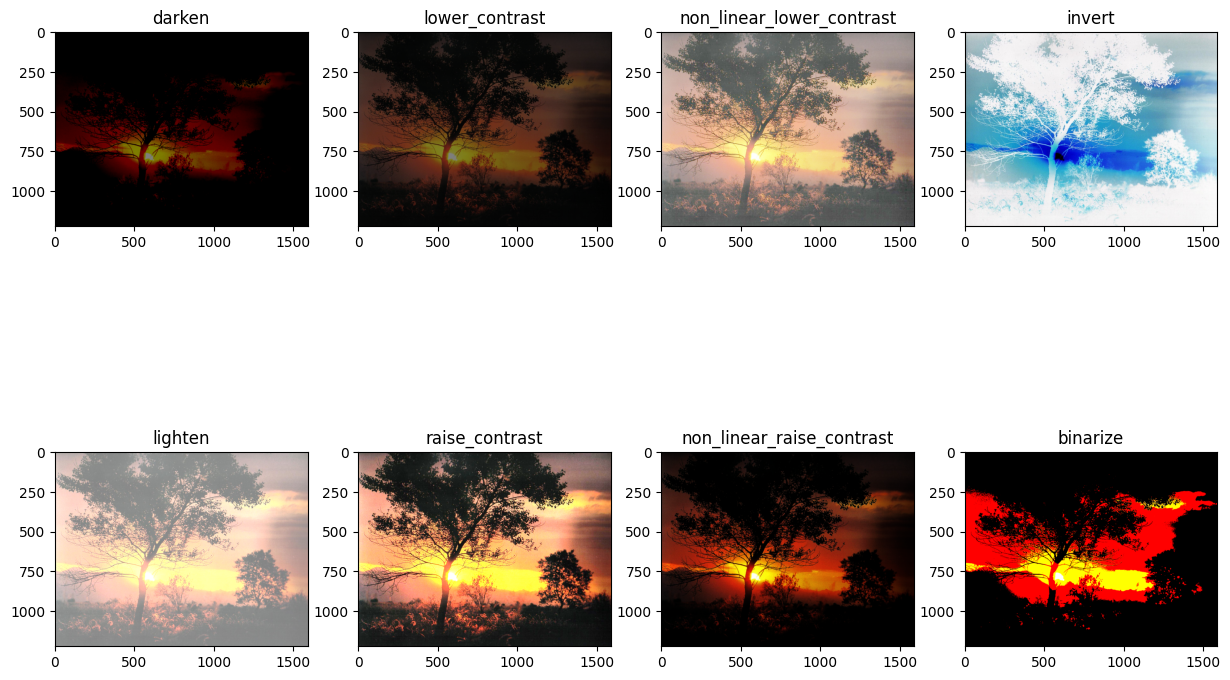

In [85]:
# put alla transformation in a list and then plot them in a grid
transformations = [
    darken,
    lower_contrast,
    non_linear_lower_contrast,
    invert,
    lighten,
    raise_contrast,
    non_linear_raise_contrast,
    binarize
]

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs = axs.ravel()
for i, transformation in enumerate(transformations):
    image = transformation(image_rgb)
    axs[i].imshow(image)
    axs[i].set_title(transformation.__name__)

plt.show()


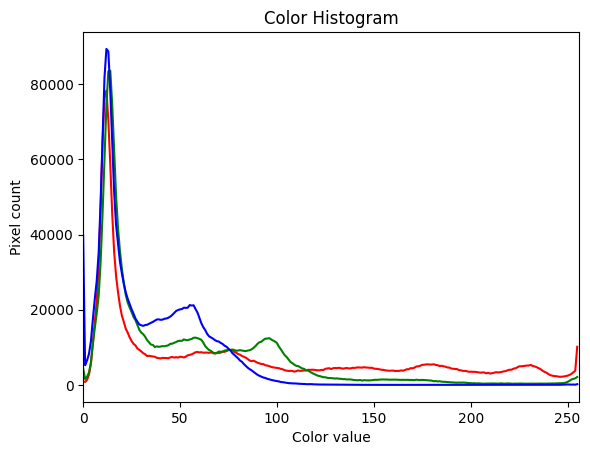

In [124]:
distribution = plot_histogram(image_rgb)

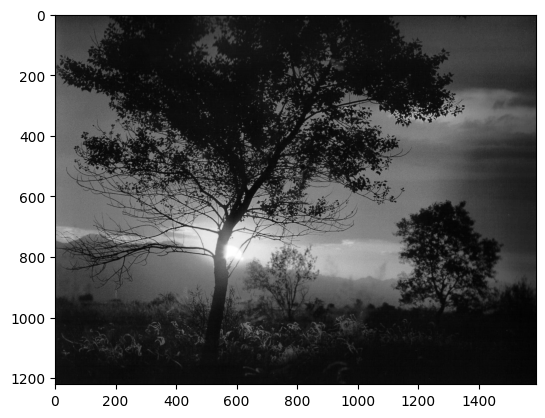

In [6]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')

In [8]:
image_gray = image_gray.reshape(image_gray.shape[0], image_gray.shape[1], 1)

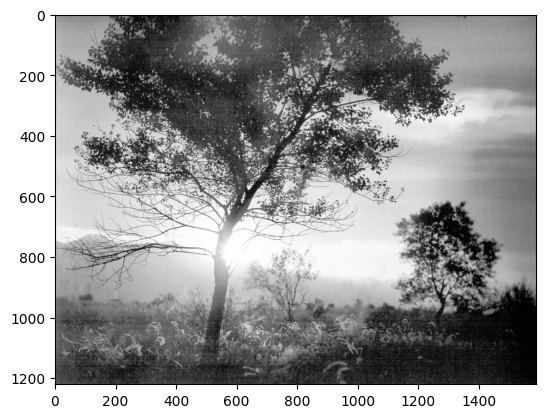

In [9]:
def equalize_histogram(image):
    
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))
    
    cdf = np.cumsum(histogram)
    
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    
    image_equalized = cdf[image]
    return image_equalized

plt.imshow(equalize_histogram(image_gray), cmap='gray')

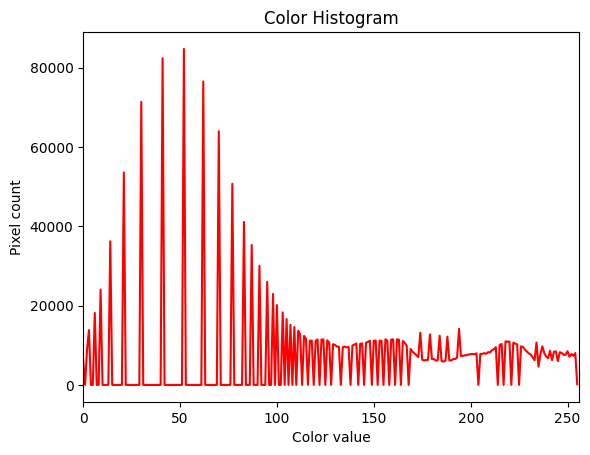

In [14]:
plot_histogram(equalize_histogram(image_gray))

Realizziamo delle trasformazioni migliori

In [7]:
image = matplotlib.image.imread('img.jpg')
# convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


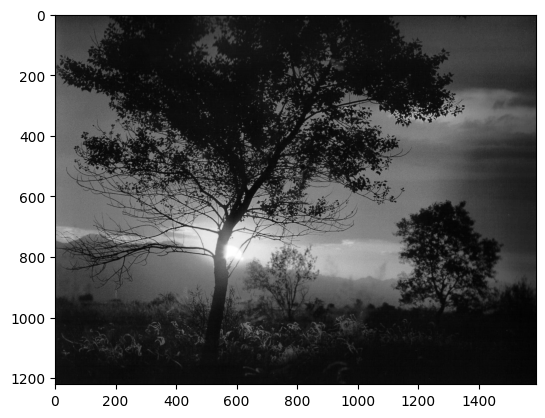

In [24]:
plt.imshow(image, cmap='gray')

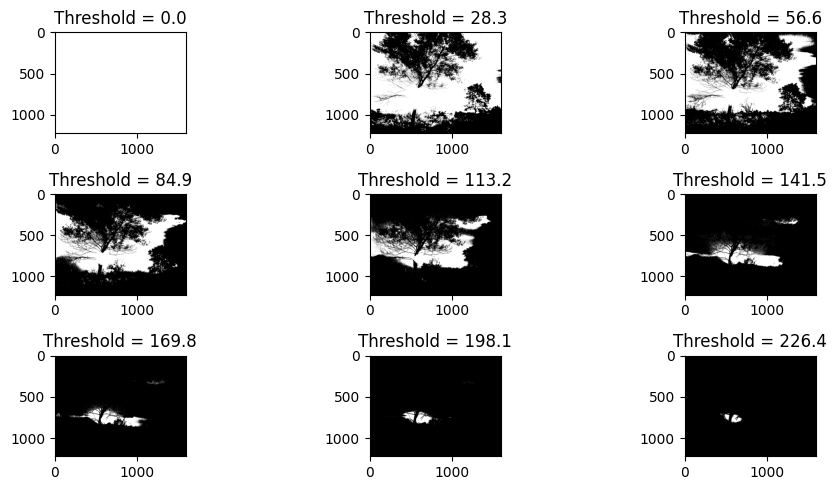

In [76]:
def binarize(image,threshold=128):
    new_image = np.zeros(image.shape)
    new_image[image>threshold]=255
    return new_image.astype(int)

fig, axes = plt.subplots(3, 3, figsize=(10, 5))
axes = axes.ravel()
for i in range(9):
    axes[i].imshow(binarize(image,threshold=28.3*i), cmap='gray')
    axes[i].set_title('Threshold = {}'.format(28.3*i))

plt.tight_layout()


    